# Proyecto IA - Aprendizaje por Refuerzo
---

## Integrantes
- Andrés Francisco García Rivero
- Jorge Muñoz Rodríguez

### Apartado 1: Implementación mediante Q-Learning

In [499]:
import numpy as np
import mdptoolbox.mdp as mdp
import matplotlib.pyplot as plt

In [500]:
# Leer el mapa
def lee_mapa(fichero):
    with open(fichero,'r') as archivo:
        lineas = archivo.readlines()
    numeros = [float(numero) for numero in lineas[0].split()]
    lineas.pop(0)
    lineas.reverse()
    matriz = []
    for linea in lineas:
        fila = [int(caracter) for caracter in linea.strip()]
        matriz.append(fila)
    return np.array(matriz).T,(int(numeros[0]),int(numeros[1]))

mapa,destino = lee_mapa("map.txt")

In [501]:
# Parámetros del entorno
n,m = mapa.shape
Perror = 0.1  # Probabilidad de error en el movimiento
print(m,n)

15 51


In [502]:
# Posiciones inicial y final
Pinit = np.random.randint(n),np.random.randint(m)
while mapa[Pinit] == 1 or Pinit == destino:
    Pinit = np.random.randint(n),np.random.randint(m)
Pend = (destino[0], destino[1])

print("Posición inicial:", Pinit)
print("Posición final:", Pend)

Posición inicial: (31, 1)
Posición final: (40, 7)


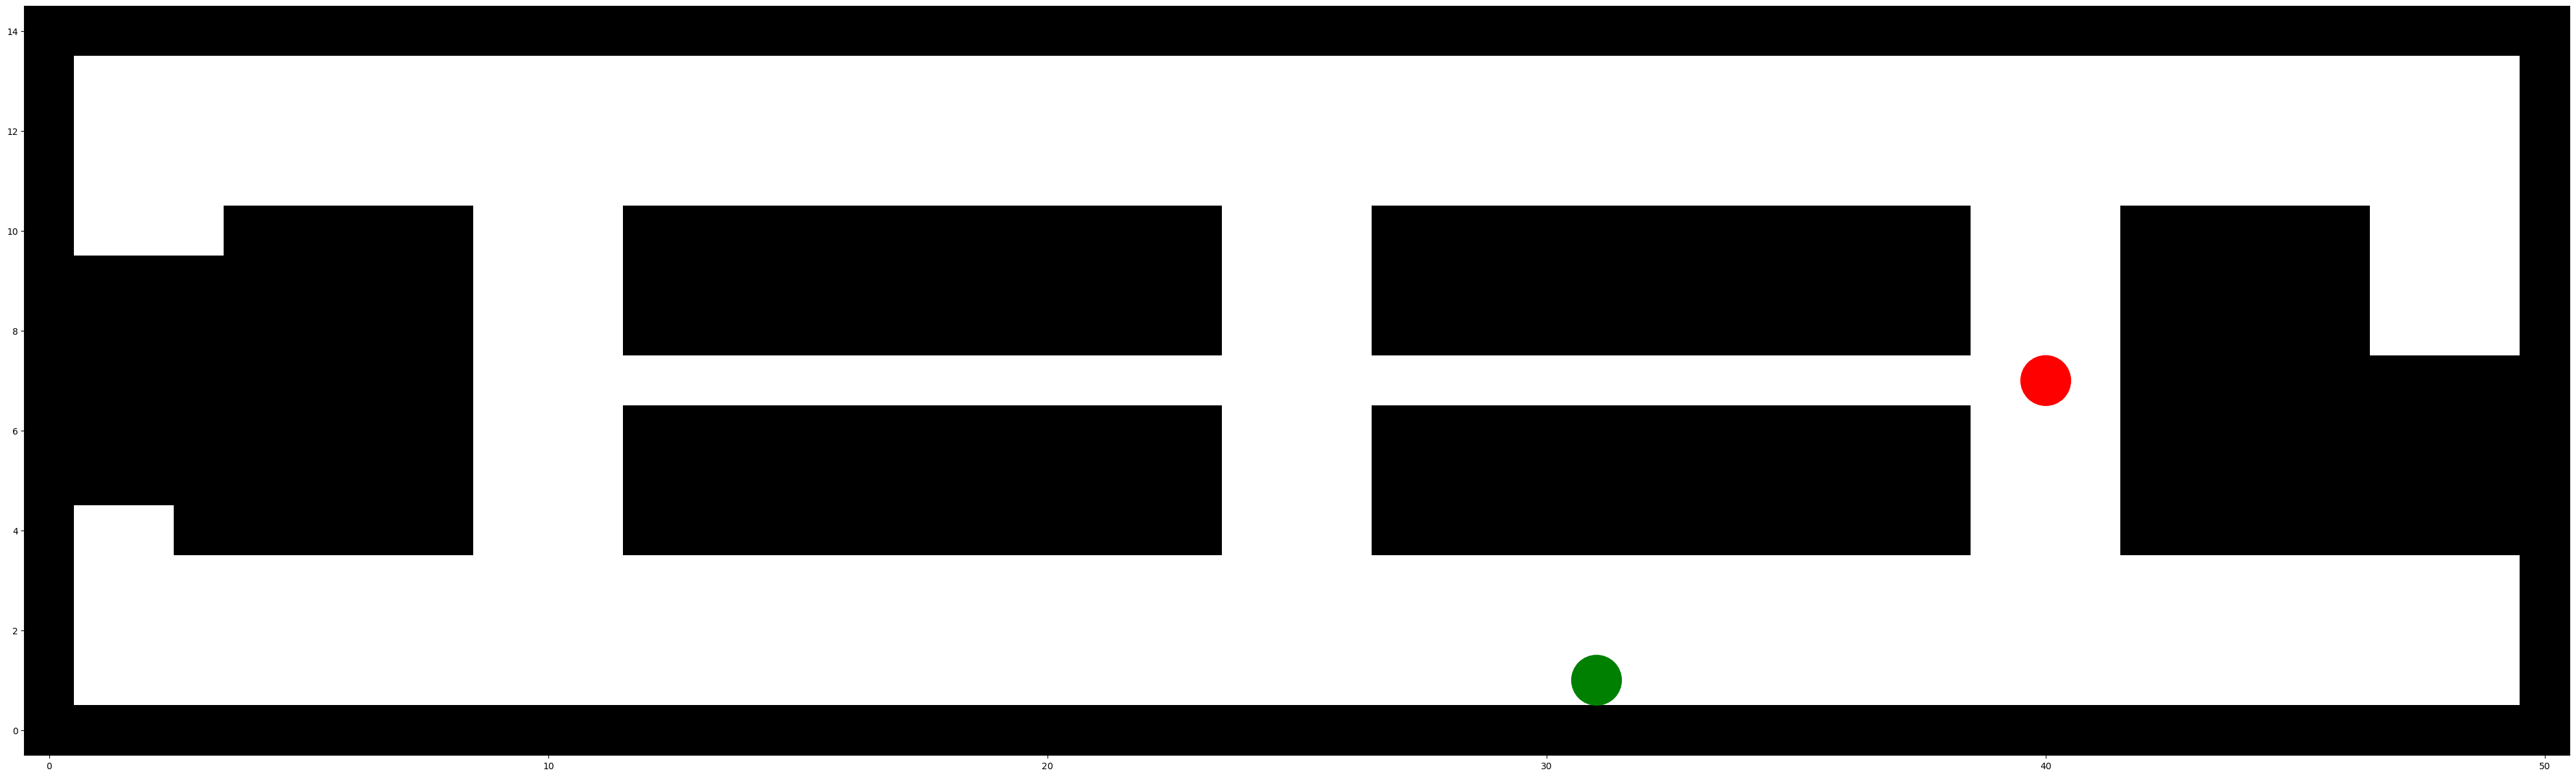

In [503]:
def visualiza_mapa():
    mapa_visual = np.copy(mapa).T
    plt.figure(figsize=(len(mapa_visual[0]), len(mapa_visual)))
    plt.imshow(1-mapa_visual, cmap='gray', interpolation='none')
    plt.xlim(-0.5, len(mapa_visual[0]) - 0.5)
    plt.ylim(-0.5, len(mapa_visual) - 0.5)
    plt.gca().add_patch(plt.Circle(destino,radius = 0.5,edgecolor = 'red', facecolor = 'red'))
    plt.gca().add_patch(plt.Circle(Pinit,radius = 0.5,edgecolor = 'green', facecolor = 'green'))

visualiza_mapa()

In [504]:
def hay_colision(estado):
    return mapa[estado]==1

def aplica_accion(estado,accion):
    if hay_colision(estado):
        return estado
    x = estado[0]
    y = estado[1]
    
    if accion == 'N':
        y += 1
    elif accion == 'S':
        y -= 1
    elif accion == 'E':
        x += 1
    elif accion == 'O':
        x -= 1
    elif accion == 'NE':
        y += 1
        x += 1
    elif accion == 'SE':
        y -= 1
        x += 1
    elif accion == 'SO':
        y -= 1
        x -= 1
    elif accion == 'NO':
        y += 1
        x -= 1
    return x,y

In [505]:
# Función de recompensa
K1 = -100
K2 = -1000
def obtiene_recompensa(estado):
    if hay_colision(estado):
        valor = K2
    else:
        valor = - np.sqrt( (estado[0]-destino[0])**2 + (estado[1]-destino[1])**2)
    return valor

In [506]:
nav_estados = []
for i in range(0,mapa.shape[0]):
    for j in range(0,mapa.shape[1]):
        nav_estados.append(tuple([i,j]))
nav_estados

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (7, 0),
 (7, 1),
 (

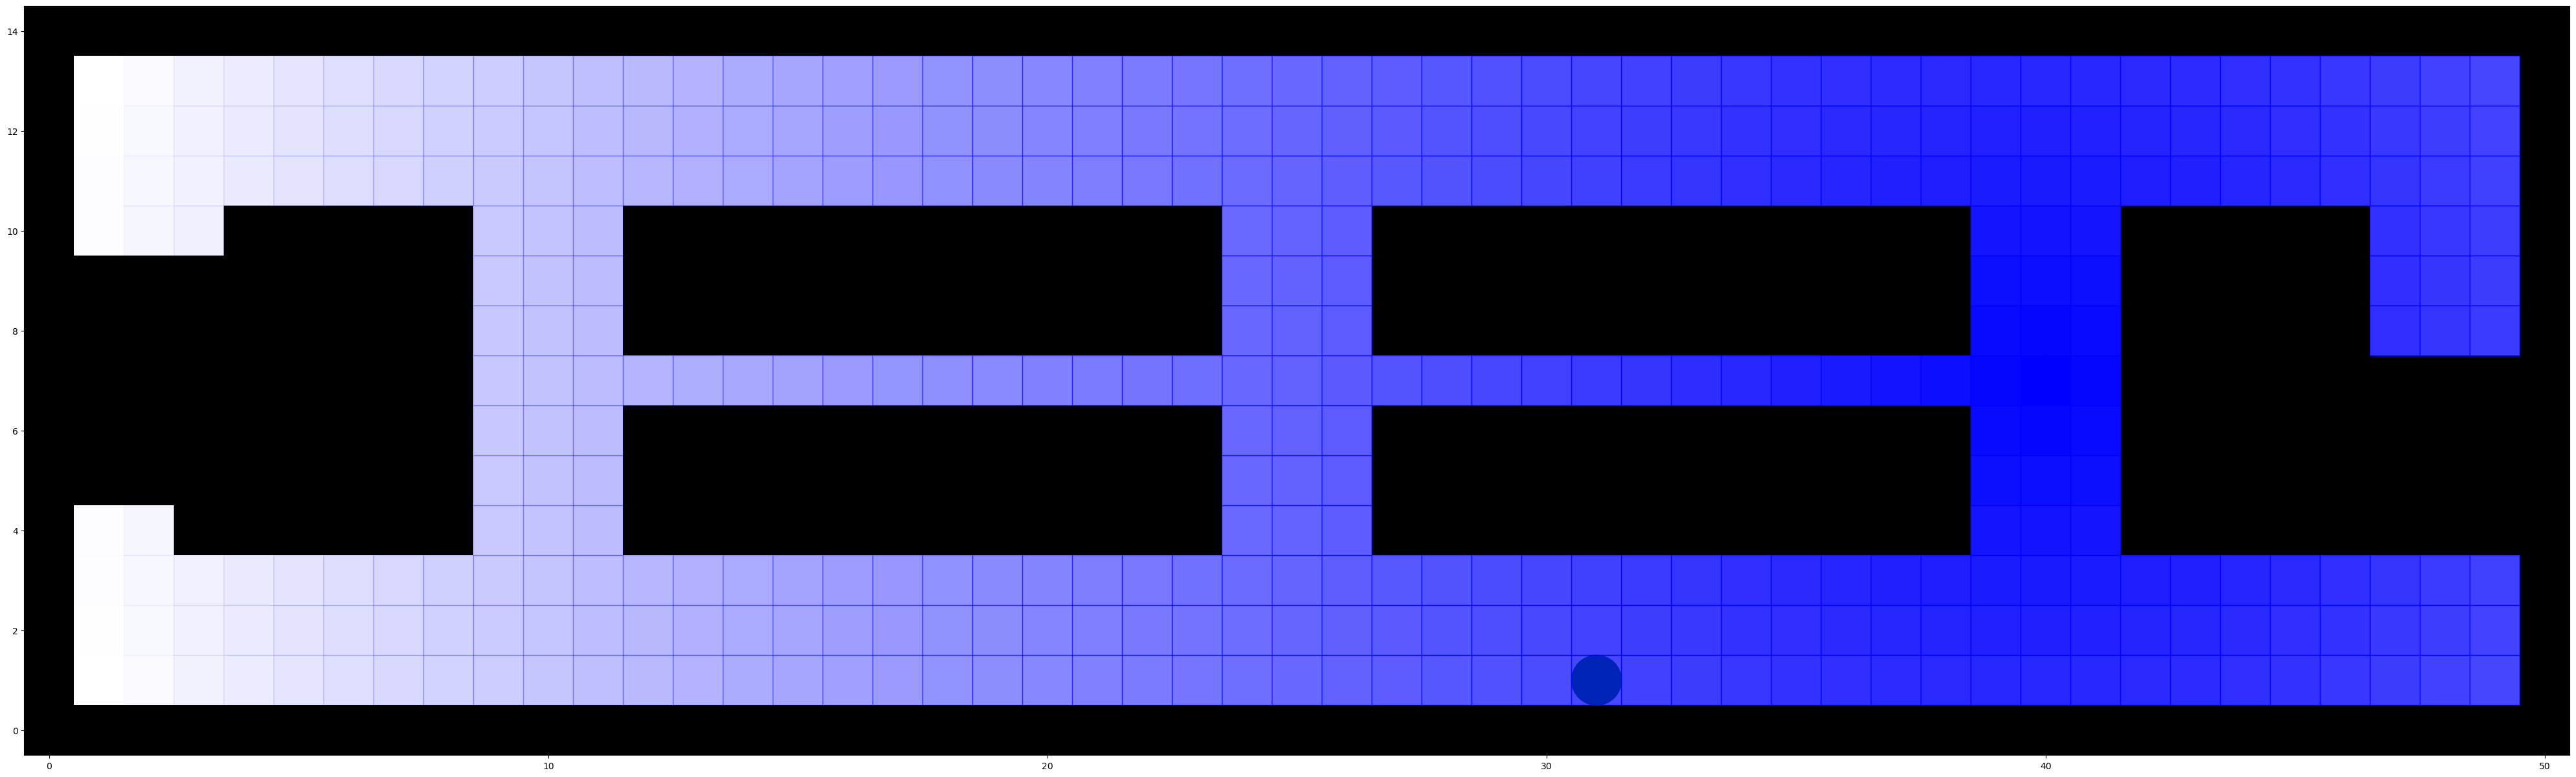

In [507]:
def visualiza_recompensas():
    visualiza_mapa()
    recompensas = [obtiene_recompensa(e) for e in nav_estados]
    recompensas = [np.nan if elemento == -1000 else elemento for elemento in recompensas]
    max_recompensa = np.nanmax(recompensas)
    min_recompensa = np.nanmin(recompensas)
    for e in nav_estados:
        r = obtiene_recompensa(e)
        if r == -1000:
            continue
        a = (r-min_recompensa)/(max_recompensa-min_recompensa)
        rect = plt.Rectangle((e[0] - 0.5, e[1] - 0.5), 1, 1, alpha = a,linewidth=1, edgecolor='blue', facecolor='blue')
        plt.gca().add_patch(rect)

visualiza_recompensas()

In [508]:
nav_acciones = ['wait','N','NE','E','SE','S','SO','O','NO']
def crea_recompensas_sistema():
    matriz = []
    for e in nav_estados:
        r = obtiene_recompensa(e)
        fila = [r]*len(nav_acciones)
        if e != destino:
            fila[0]=-100000
        matriz.append(fila)
    return np.array(matriz)
nav_recompensas_sistema = crea_recompensas_sistema()
print(nav_recompensas_sistema[17])

[-1.00000000e+05 -3.93192065e+01 -3.93192065e+01 -3.93192065e+01
 -3.93192065e+01 -3.93192065e+01 -3.93192065e+01 -3.93192065e+01
 -3.93192065e+01]


In [509]:
def obtiene_indice_estado(estado):
    return int(estado[0]*mapa.shape[1]+estado[1])

In [510]:
def obtiene_posibles_errores(accion):
    if accion=='N':
        errores = ['NE','NO']
    elif accion=='S':
        errores = ['SE','SO']
    elif accion=='E':
        errores = ['NE','SE']
    elif accion=='O':
        errores = ['NO', 'SO']
    elif accion=='NE':
        errores = ['N','E']
    elif accion=='NO':
        errores = ['N','O']
    elif accion=='SE':
        errores = ['S','E']
    elif accion == 'SO':
        errores = ['S','O']
    else:
        errores = []
    return errores

In [511]:
def crea_transiciones_movimiento(accion, prob_error):
    matriz = []
    for e0 in nav_estados:
        fila = [0]*len(nav_estados)
        if hay_colision(e0):
            fila[obtiene_indice_estado(e0)]=1
        else:
            goal = aplica_accion(e0,accion)
            errores = obtiene_posibles_errores(accion)
            if len(errores)==0:
                fila[obtiene_indice_estado(goal)] = 1
            else:
                fila[obtiene_indice_estado(goal)] = 1 - prob_error
                for error in errores:
                    goal_error = aplica_accion(e0,error)
                    fila[obtiene_indice_estado(goal_error)] = prob_error/len(errores)
        matriz.append(fila)
    return np.array(matriz)

In [512]:
def crea_transiciones_sistema(prob_error):
    return np.array([crea_transiciones_movimiento('wait',prob_error), 
                     crea_transiciones_movimiento('N',prob_error),
                     crea_transiciones_movimiento('NE',prob_error),
                     crea_transiciones_movimiento('E',prob_error),
                     crea_transiciones_movimiento('SE',prob_error),
                     crea_transiciones_movimiento('S',prob_error),
                     crea_transiciones_movimiento('SO',prob_error),
                     crea_transiciones_movimiento('O',prob_error),
                     crea_transiciones_movimiento('NO',prob_error)])

nav_transiciones_sistema = crea_transiciones_sistema(Perror)

In [513]:
# Implementación de Q-Learning con mdptoolbox
ql = mdp.QLearning(nav_transiciones_sistema, nav_recompensas_sistema, discount=0.95, n_iter=300000)
ql.run()

In [514]:
print("Política óptima:")
print(ql.policy)
print(len(ql.policy))
print("Acciones" + str(nav_acciones))

# Visualización de la política óptima
i = 0
for action in ql.policy:
    print("Decisión en el estado ", i, "( " + str(i // m) + ", " + str(i % m) + "): ", nav_acciones[action])
    i+=1


Política óptima:
(1, 5, 8, 8, 2, 8, 2, 7, 7, 6, 4, 3, 7, 4, 3, 1, 6, 2, 3, 7, 8, 3, 2, 6, 4, 4, 4, 3, 4, 1, 5, 8, 8, 3, 5, 1, 6, 2, 3, 1, 3, 6, 8, 3, 8, 7, 7, 7, 8, 6, 4, 6, 5, 7, 1, 1, 8, 3, 7, 5, 1, 8, 1, 3, 1, 3, 7, 3, 7, 1, 7, 6, 6, 5, 2, 7, 8, 3, 6, 4, 2, 4, 8, 7, 1, 6, 2, 5, 5, 5, 4, 3, 1, 5, 8, 8, 3, 7, 8, 2, 1, 7, 4, 6, 2, 6, 8, 1, 5, 3, 6, 6, 7, 2, 6, 5, 3, 2, 4, 2, 6, 1, 2, 3, 3, 6, 3, 8, 4, 2, 6, 2, 7, 6, 2, 4, 2, 6, 5, 2, 3, 4, 1, 2, 2, 3, 7, 1, 7, 5, 8, 8, 5, 4, 6, 5, 2, 4, 1, 8, 2, 2, 8, 5, 4, 3, 7, 3, 4, 7, 7, 7, 5, 5, 5, 6, 7, 4, 6, 2, 7, 7, 8, 3, 8, 8, 5, 3, 1, 8, 7, 7, 4, 5, 6, 8, 8, 7, 7, 6, 8, 4, 7, 3, 1, 6, 2, 8, 7, 8, 2, 8, 8, 5, 2, 5, 8, 7, 1, 7, 1, 2, 5, 3, 6, 8, 1, 2, 5, 2, 1, 2, 5, 6, 2, 4, 1, 6, 5, 2, 3, 7, 1, 5, 3, 1, 2, 7, 4, 7, 8, 1, 5, 7, 7, 4, 7, 5, 5, 3, 7, 3, 5, 2, 2, 5, 8, 5, 8, 2, 3, 8, 7, 6, 2, 3, 7, 6, 7, 7, 2, 1, 1, 3, 3, 2, 1, 8, 4, 7, 8, 5, 5, 5, 8, 5, 8, 7, 7, 5, 1, 3, 3, 6, 2, 7, 8, 7, 5, 7, 8, 1, 2, 5, 6, 5, 7, 7, 5, 3, 7, 2, 3, 5, 8, 8, 3, 2

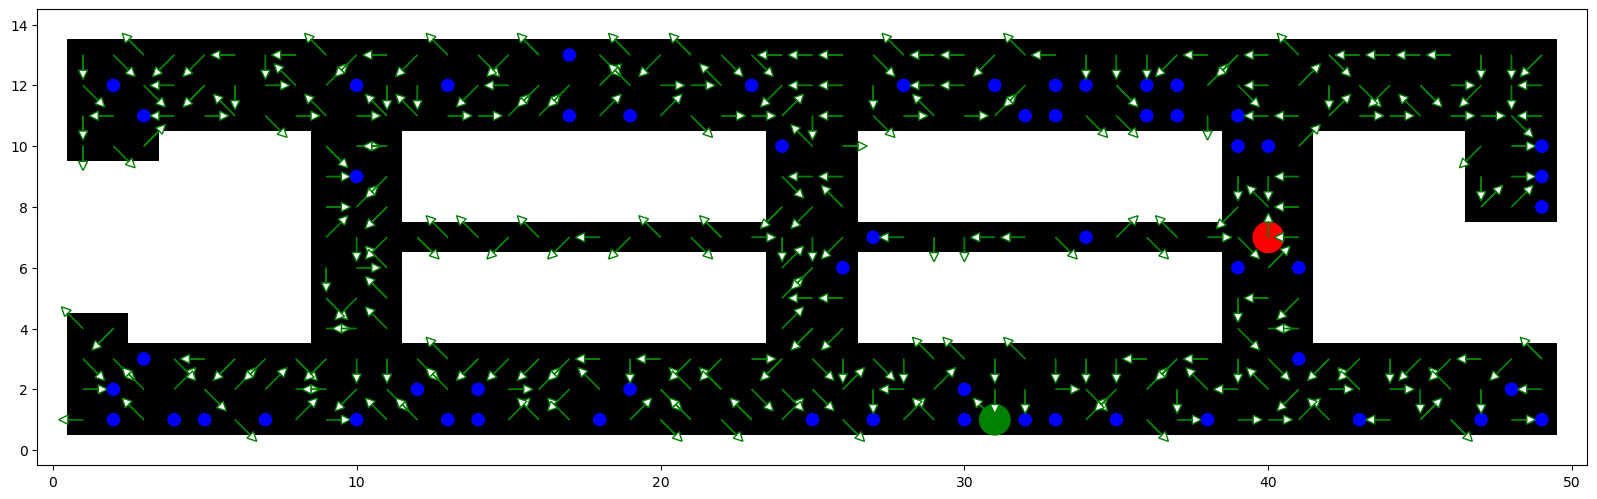

In [515]:
# Definir un diccionario para mapear índices de acciones a desplazamientos
movimientos = {
    'n': (0, 1), 'ne': (1, 1), 'e': (1, 0), 'se': (1, -1),
    's': (0, -1), 'sw': (-1, -1), 'w': (-1, 0), 'nw': (-1, 1), 'wait': (0, 0)
}

# Lista de acciones
acciones = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'wait']

def aplica_accion(estado, accion):
    mov = movimientos[accion]
    return (estado[0] + mov[0], estado[1] + mov[1])

def visualiza_mapa():
    plt.figure(figsize=(20, 20))
    plt.imshow(mapa.T, cmap='gray', origin='lower')
    plt.gca().add_patch(plt.Circle((destino), radius=0.5, edgecolor='red', facecolor='red'))
    plt.gca().add_patch(plt.Circle((Pinit), radius=0.5, edgecolor='green', facecolor='green'))

def visualiza_politica(politica):
    visualiza_mapa()
    for i in range(n):
        for j in range(m):
            if mapa[i, j] == 0:
                s_index = i * m + j
                accion = acciones[politica[s_index]].lower()
                if accion == 'wait':
                    plt.gca().add_patch(plt.Circle((i,j), radius=0.2, edgecolor='blue', facecolor='blue'))
                    continue
                estado = (i, j)
                e1 = aplica_accion(estado, accion)
                x0, y0 = estado[0], estado[1]
                x1, y1 = e1[0], e1[1]

                plt.gca().arrow(x0, y0, (x1 - x0) * 0.5, (y1 - y0) * 0.5, head_width=0.3, head_length=0.3, fc='white', ec='green')
    plt.show()
visualiza_politica(ql.policy)

In [516]:
i = 0
for action in ql.policy:
    if(action == 8):
        print("wait en el estado ", i)
    i+=1

wait en el estado  2
wait en el estado  3
wait en el estado  5
wait en el estado  20
wait en el estado  31
wait en el estado  32
wait en el estado  42
wait en el estado  44
wait en el estado  48
wait en el estado  56
wait en el estado  61
wait en el estado  76
wait en el estado  82
wait en el estado  94
wait en el estado  95
wait en el estado  98
wait en el estado  106
wait en el estado  127
wait en el estado  150
wait en el estado  151
wait en el estado  159
wait en el estado  162
wait en el estado  182
wait en el estado  184
wait en el estado  185
wait en el estado  189
wait en el estado  195
wait en el estado  196
wait en el estado  200
wait en el estado  207
wait en el estado  209
wait en el estado  211
wait en el estado  212
wait en el estado  216
wait en el estado  225
wait en el estado  250
wait en el estado  266
wait en el estado  268
wait en el estado  271
wait en el estado  287
wait en el estado  290
wait en el estado  294
wait en el estado  296
wait en el estado  306
wait en